# Final Assignment

<img src="harrypotter.jpeg">

# Abstract 

This project involves the use of two main techniques in natural language processing: Sentiment analysis and TextRank algorithm

Sentiment analysis is a technique used to identify and extract the sentiment expressed in a given text. In this project, sentiment analysis is used to identify positive, negative, and neutral words in a Harry Potter dataset. By analyzing the sentiment of the words, it is possible to identify the overall emotional tone of the text.

TextRank algorithm, on the other hand, is a graph-based ranking algorithm used to extract the most important sentences or words from a given text. In this project, TextRank algorithm is used to identify the most important sentences in the Harry Potter dataset


# Aim 

Evaluate the performance of algorithms - Sentiment and Text Rank algorithms to identify the nature of words and their importance.

# Dataset 

Link -https://github.com/nuochenpku/Harry-Potter-Dialogue-Dataset

The dataset consists of text data of first four Harry Potter Books.

### Sentiment Analysis Using NLP

Sentiment analysis, also known as opinion mining, is a branch of natural language processing (NLP) that aims to determine the emotional tone or attitude of a piece of text. It involves the use of machine learning algorithms to analyze the language used in text data, and determine whether the overall sentiment expressed is positive, negative or neutral.

The process of sentiment analysis involves several steps, including text preprocessing, feature extraction, and classification. 

Text preprocessing involves cleaning the text data by removing stop words, special characters, and punctuation marks. This step helps to reduce the noise in the data and improve the accuracy of the sentiment analysis.

Feature extraction involves identifying relevant features in the text data that can be used to classify the sentiment. This may involve using techniques such as tokenization, part-of-speech tagging, and entity recognition.

Classification involves using machine learning algorithms to classify the sentiment of the text data.

We are importing the harry potter first four books and performing sentiment analysis on the dataset.


In [115]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
import re

### 1. We Import the book for basic analysis 
We are importing the dataset which was downloaded from internet

In [116]:
import os
for root, dirs, files in os.walk("/Users/devikaboddu/Desktop/FinalAssignment/sample_text/"):
    for file in files:
        if file.endswith(".txt"):
             print(os.path.join(root, file))

/Users/devikaboddu/Desktop/FinalAssignment/sample_text/Book2.txt
/Users/devikaboddu/Desktop/FinalAssignment/sample_text/Book3.txt
/Users/devikaboddu/Desktop/FinalAssignment/sample_text/Book1.txt
/Users/devikaboddu/Desktop/FinalAssignment/sample_text/Book4.txt


### Distribute the dataset into paragraph
The below code uses the os module to traverse a directory tree containing text files and extract the paragraphs from those files. It then stores the extracted paragraphs in a list called "hp_paragraphs". The code first creates an empty list to store the paragraphs. It then uses the os.walk function to traverse the directory tree and loop over the files in the directory. For each file, the code checks if it ends with ".txt" and if so, opens it for reading. It then reads the contents of the file and splits the text into paragraphs using the double newline character "\n\n". The paragraphs are then added to the list "hp_paragraphs". Finally, the code prints the total number of paragraphs that have been read in so far. Overall, this code can be used to extract paragraphs from multiple text files in a directory and store them in a list for further analysis.

In [117]:
import os
hp_paragraphs = []
for root, dirs, files in os.walk("/Users/devikaboddu/Desktop/FinalAssignment/sample_text/"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r", encoding="utf8", errors='ignore') as input:
                paragraphs = input.read().split("\n\n")   #\n\n denotes there is a blank line in between paragraphs.
            #print(paragraphs[0])
            hp_paragraphs.extend(paragraphs)
            
print(len(hp_paragraphs))


/Users/devikaboddu/Desktop/FinalAssignment/sample_text/Book2.txt
/Users/devikaboddu/Desktop/FinalAssignment/sample_text/Book3.txt
/Users/devikaboddu/Desktop/FinalAssignment/sample_text/Book1.txt
/Users/devikaboddu/Desktop/FinalAssignment/sample_text/Book4.txt
10710


In [118]:
hp_paragraphs

['\nHARRY POTTER AND THE CHAMBER OF SECRETS\nby J. K. Rowling',
 '(this is BOOK 2 in the Harry Potter series)',
 'Original Scanned/OCR: Friday, April 07, 2000\nv1.0\n(edit where needed, change version number by 0.1)',
 '\nC H A P T E RR\t\tO N E',
 'THE WORST BIRTHDAY',
 "Not for the first time, an argument had broken out over breakfast at\nnumber four, Privet Drive. Mr. Vernon Dursley had been woken in\nthe early hours of the morning by a loud, hooting noise from his\nnephew Harry's room.",
 '"Third time this week!" he roared across the table. "If you can\'t\ncontrol that owl, it\'ll have to go!"',
 'Harry tried, yet again, to explain.',
 '"She\'s bored," he said. "She\'s used to flying around outside. If I could\njust let her out at night -"',
 '"Do I look stupid?" snarled Uncle Vernon, a bit of fried egg dangling\nfrom his bushy mustache. "I know what\'ll happen if that owl\'s let\nout."',
 'He exchanged dark looks with his wife, Petunia.',
 "Harry tried to argue back but his words 

### Seperate the paragraph into sentences
The code first creates an empty list called "hp_sentences" to store the extracted sentences. It then uses the os.walk function to traverse the directory tree rooted at "/Users/devikaboddu/Desktop/FinalAssignment/sample_text/". For each file, the code checks if it ends with ".txt" and if so, opens it for reading. It then reads the contents of the file and splits the text into sentences using the period "." character. The sentences are then added to the list "hp_sentences". Finally, the code prints the total number of sentences that have been read in so far.
This code can be useful for extracting sentences from multiple text files in a directory and storing them in a list for further analysis, such as natural language processing and text mining

In [119]:
import os
hp_sentences = []
for root, dirs, files in os.walk("/Users/devikaboddu/Desktop/FinalAssignment/sample_text/"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r", encoding="utf8", errors='ignore') as input:
                sentences = input.read().split(". ")   #. denotes end of sentence
            hp_sentences.extend(sentences)
            
print(len(hp_sentences))


/Users/devikaboddu/Desktop/FinalAssignment/sample_text/Book2.txt
/Users/devikaboddu/Desktop/FinalAssignment/sample_text/Book3.txt
/Users/devikaboddu/Desktop/FinalAssignment/sample_text/Book1.txt
/Users/devikaboddu/Desktop/FinalAssignment/sample_text/Book4.txt
21509


In [120]:
print(hp_sentences)

['\nHARRY POTTER AND THE CHAMBER OF SECRETS\nby J', 'K', 'Rowling\n\n(this is BOOK 2 in the Harry Potter series)\n\nOriginal Scanned/OCR: Friday, April 07, 2000\nv1.0\n(edit where needed, change version number by 0.1)\n\n\nC H A P T E RR\t\tO N E\n\nTHE WORST BIRTHDAY\n\nNot for the first time, an argument had broken out over breakfast at\nnumber four, Privet Drive', 'Mr', 'Vernon Dursley had been woken in\nthe early hours of the morning by a loud, hooting noise from his\nnephew Harry\'s room.\n\n"Third time this week!" he roared across the table', '"If you can\'t\ncontrol that owl, it\'ll have to go!"\n\nHarry tried, yet again, to explain.\n\n"She\'s bored," he said', '"She\'s used to flying around outside', 'If I could\njust let her out at night -"\n\n"Do I look stupid?" snarled Uncle Vernon, a bit of fried egg dangling\nfrom his bushy mustache', '"I know what\'ll happen if that owl\'s let\nout."\n\nHe exchanged dark looks with his wife, Petunia.\n\nHarry tried to argue back but his 

### Converting the data into DataFrame using pandas

In [121]:
import pandas as pd
hp_df = pd.DataFrame(hp_sentences, columns = ['Sentence'])
hp_df.head()

Sentence
0    \nHARRY POTTER AND THE CHAMBER OF SECRETS\nby J
1                                                  K
2  Rowling\n\n(this is BOOK 2 in the Harry Potter...
3                                                 Mr
4  Vernon Dursley had been woken in\nthe early ho...

### Importing Nltk for Sentiment Analysis
NLTK (Natural Language Toolkit) is a widely used Python library for natural language processing tasks such as sentiment analysis. It provides a wide range of tools and resources for processing text data, including functions for tokenization, stemming, lemmatization, part-of-speech tagging, and more.
To perform sentiment analysis with NLTK, one approach is to use the NLTK's built-in sentiment analysis module called "VADER" (Valence Aware Dictionary and sEntiment Reasoner). VADER is a lexicon and rule-based sentiment analysis tool that is specifically designed for social media text. It can handle negations, intensifiers, and other features commonly found in social media language.

In [122]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
#sid.polarity_scores(hp_paragraphs[100])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/devikaboddu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!




The given code plots a graph of sentiment scores for a series of paragraphs using the VADER sentiment analysis tool. 

The `range()` function generates a sequence of integers from 0 to 10710, with a step size of 1. This is used as the index to retrieve each paragraph from a list called `hp_paragraphs`. 

For each paragraph, the `polarity_scores()` function from the VADER sentiment analysis tool is used to generate a sentiment score. The sentiment score is a dictionary with four keys: "neg" (negative), "neu" (neutral), "pos" (positive), and "compound" (overall score). The `sorted()` function is used to sort the dictionary items by key, and `zip()` is used to separate the keys and values into two tuples `x` and `y`, respectively. 

The `plot()` function is then used to plot the sentiment scores for each paragraph. The x-axis represents the sentiment categories ("neg", "neu", "pos", "compound"), and the y-axis represents the percentage of each sentiment category in the paragraph. 

The resulting graph shows the distribution of sentiment scores for the given paragraphs, allowing for a quick visual assessment of the overall sentiment of the text.

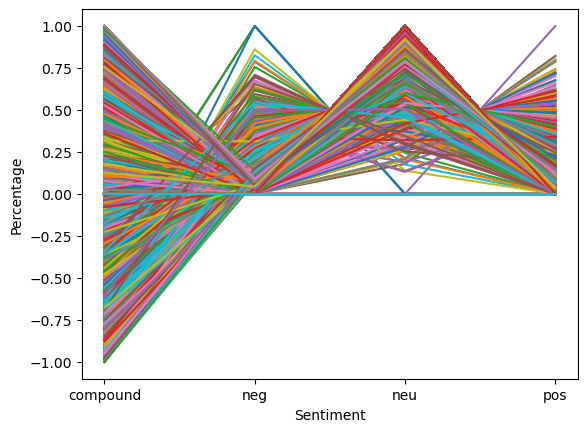

In [123]:
for i in range(0,10710,1):
    z=sid.polarity_scores(hp_paragraphs[i])
    lists=sorted(z.items())
    x, y = zip(*lists)
    plt.plot(x, y)
plt.xlabel("Sentiment")
plt.ylabel("Percentage")

plt.show()

In [126]:
import re
def eda(sentences):
    processed_sentences = []

    for s in sentences:
        # Remove all the special characters
        processed_sentence = re.sub(r'\W', ' ', str(s))

        # remove all single characters
        processed_sentence= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_sentence)

        # Remove single characters from the start
        processed_sentence = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_sentence) 

        # Substituting multiple spaces with single space
        processed_sentence = re.sub(r'\s+', ' ', processed_sentence, flags=re.I)

        # Removing prefixed 'b'
        processed_sentence = re.sub(r'^b\s+', '', processed_sentence)

        # Converting to Lowercase
        processed_sentence = processed_sentence.lower()

        processed_sentences.append(processed_sentence)
        
    return processed_sentences

In [127]:
processed_sentences = eda(hp_sentences)

In [128]:
processed_sentences

[' harry potter and the chamber of secrets by j',
 'k',
 'rowling this is book 2 in the harry potter series original scanned ocr friday april 07 2000 v1 0 edit where needed change version number by 0 1 h p e rr n the worst birthday not for the first time an argument had broken out over breakfast at number four privet drive',
 'mr',
 'vernon dursley had been woken in the early hours of the morning by loud hooting noise from his nephew harry room third time this week he roared across the table',
 ' if you can control that owl it ll have to go harry tried yet again to explain she bored he said',
 ' she used to flying around outside',
 'if could just let her out at night do look stupid snarled uncle vernon bit of fried egg dangling from his bushy mustache',
 ' know what ll happen if that owl let out he exchanged dark looks with his wife petunia harry tried to argue back but his words were drowned by long loud belch from the dursleys son dudley 1 want more bacon there more in the frying pan

In [129]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/devikaboddu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

The code performs text vectorization using the TfidfVectorizer class from the sklearn.feature_extraction.text module. It initializes a vectorizer object with parameters such as max_features, min_df, max_df, and stop_words. The processed_sentences list is transformed into a feature matrix using the fit_transform() method of the vectorizer object, and the resulting sparse matrix is converted to a dense array using the toarray() method. The resulting processed_sentences_vectors array contains the vectorized representation of the processed sentences, which can be used as input to machine learning algorithms for text classification and other natural language processing tasks.

In [130]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=1, max_df=0.8, stop_words=stopwords.words('english'))
processed_sentences_vectors = vectorizer.fit_transform(processed_sentences).toarray()

In [131]:
processed_sentences_vectors.shape

(21509, 2500)

In [132]:
labels = []
for i in range (21509):
    if(i<5000):
        x=0
    else:
        x=1
    labels.append(x)

In [133]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

The code uses the train_test_split function from the sklearn.model_selection module to split the feature matrix processed_sentences_vectors and the target labels labels into training and testing sets. The split is performed with a ratio of 80:20 for the training and testing sets, respectively. The resulting arrays X_train, X_test, y_train, and y_test can be used to train and evaluate a machine learning model.

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_sentences_vectors, labels, train_size = 0.8, test_size=0.2, random_state=100)

The code creates an instance of the RandomForestClassifier class from the sklearn.ensemble module, initializes it with the n_estimators and random_state parameters, and fits the model to the training data using the fit method. This creates a model that can be used to make predictions on new data.

In [135]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=100)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=100)

In [136]:
predictions = text_classifier.predict(processed_sentences_vectors[:,:2500])
predictions

array([0, 1, 1, ..., 1, 1, 1])

In [137]:
y_labels = []
for i in range (21509):
    if(i<5000):
        x=0
    else:
        x=1
    y_labels.append(x)

In [138]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_labels, predictions))
print(classification_report(y_labels, predictions))
print(accuracy_score(y_labels, predictions))

[[ 3879  1121]
 [  120 16389]]
              precision    recall  f1-score   support

           0       0.97      0.78      0.86      5000
           1       0.94      0.99      0.96     16509

    accuracy                           0.94     21509
   macro avg       0.95      0.88      0.91     21509
weighted avg       0.94      0.94      0.94     21509

0.9423032219071087


### Distribution of words in each sentence 

In [139]:
hp_df = pd.DataFrame(processed_sentences, columns = ['Sentence'])
hp_df.head()

Sentence
0       harry potter and the chamber of secrets by j
1                                                  k
2  rowling this is book 2 in the harry potter ser...
3                                                 mr
4  vernon dursley had been woken in the early hou...

Text(0.5, 1.0, 'Distribution of number of words in each sentence')

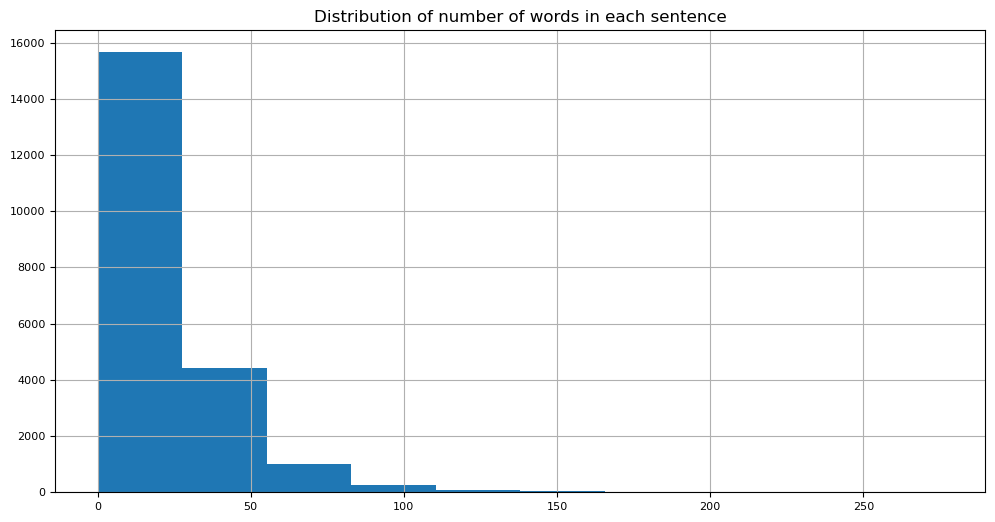

In [140]:
hp_df['NumWords'] = hp_df['Sentence'].apply(lambda x: len(x.split()))
hp_df[['NumWords']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8);
plt.title("Distribution of number of words in each sentence")

In [141]:
stop = stopwords.words('english')

### Removing Specific stopwords

In [142]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = list(STOP_WORDS)
stop_words.append('said')
print(len(stop_words))
print(stop_words)

327
['every', 'five', 'hereupon', 'her', 'none', 'some', 'seems', 'over', 'we', 'three', 'them', 'get', 'bottom', 'neither', 'four', 'whereas', 'amongst', 'hundred', 'hence', "'re", 'along', 'with', 'seeming', 'yours', 'across', 'by', 'nor', 'former', 'namely', 'who', "'ve", "'s", 'where', 'used', 'n’t', 'both', 'nowhere', 'put', 'should', '’s', 'yourselves', 'themselves', 'could', 'ca', 'elsewhere', 'becoming', 'yet', 'now', 'because', 'anyway', 'however', 'what', '‘d', '’d', 'enough', 'even', 'almost', 'again', 'than', 'ten', 'had', 'whereafter', 'cannot', 'us', 'towards', 'since', 'within', 'behind', 'be', 'well', 'say', 'they', 'whom', 'thence', 'above', 'not', 'to', 'hereby', 'one', 'when', 'thus', 'n‘t', 'beyond', 'among', 'sometimes', 'am', '’ve', 'are', 'through', 'somewhere', 'me', 'sometime', 'was', 'while', '‘ve', 'few', 'part', 'most', 'why', 'please', 'therefore', 'just', 'throughout', 'moreover', 'forty', 'hereafter', 'around', 'made', 'until', 'this', 'due', 'were', 'on'

In [143]:
all_sentences = hp_df['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
all_sentences

0                           harry potter chamber secrets j
1                                                        k
2        rowling book 2 harry potter series original sc...
3                                                       mr
4        vernon dursley woken early hours morning loud ...
                               ...                        
21504    hugged harry tightly saw whispered ear think d...
21505                                          touch harry
21506    harry ron clapping bye harry hermione kissed c...
21507    point worrying told got dursleys car hagrid co...
21508                                                 meet
Name: Sentence, Length: 21509, dtype: object

In [144]:
all_words = ''.join([word for word in all_sentences]).replace('\n', ' ')
all_words

'harry potter chamber secrets jkrowling book 2 harry potter series original scanned ocr friday april 07 2000 v1 0 edit needed change version number 0 1 h p e rr n worst birthday time argument broken breakfast number privet drivemrvernon dursley woken early hours morning loud hooting noise nephew harry room time week roared tablecontrol owl ll harry tried explain boredflying outsidelet night look stupid snarled uncle vernon bit fried egg dangling bushy mustacheknow ll happen owl let exchanged dark looks wife petunia harry tried argue words drowned long loud belch dursleys son dudley 1 want bacon frying pan sweetums aunt petunia turning misty eyes massive sonbuild ve got chancedon like sound school food nonsense petunia went hungry smeltings uncle vernon heartilydudley gets don son dudley large drooped kitchen chair grinned turned harry pass frying pan ve forgotten magic word harry irritably effect simple sentence rest family incredible dudley gasped fell chair crash shook kitchen mrsdur

In [145]:
all_words = ''.join([word for word in all_sentences]).replace("\'", "")
all_words

'harry potter chamber secrets jkrowling book 2 harry potter series original scanned ocr friday april 07 2000 v1 0 edit needed change version number 0 1 h p e rr n worst birthday time argument broken breakfast number privet drivemrvernon dursley woken early hours morning loud hooting noise nephew harry room time week roared tablecontrol owl ll harry tried explain boredflying outsidelet night look stupid snarled uncle vernon bit fried egg dangling bushy mustacheknow ll happen owl let exchanged dark looks wife petunia harry tried argue words drowned long loud belch dursleys son dudley 1 want bacon frying pan sweetums aunt petunia turning misty eyes massive sonbuild ve got chancedon like sound school food nonsense petunia went hungry smeltings uncle vernon heartilydudley gets don son dudley large drooped kitchen chair grinned turned harry pass frying pan ve forgotten magic word harry irritably effect simple sentence rest family incredible dudley gasped fell chair crash shook kitchen mrsdur

### Wordcloud for the text

A word cloud is a visualization tool that represents words in a visual format, where the size of the word represents its frequency or importance in the text.

To create a word cloud, we first need to preprocess the text data. This involves removing stopwords (common words like "the", "and", etc.), punctuation, and any other irrelevant information. We can also perform stemming or lemmatization to reduce words to their base form.

Next, we can use a word cloud library like wordcloud in Python to create the visualization. We need to pass in the preprocessed text data as a string and specify the desired parameters for the word cloud, such as the background color, font size, and maximum number of words to display.

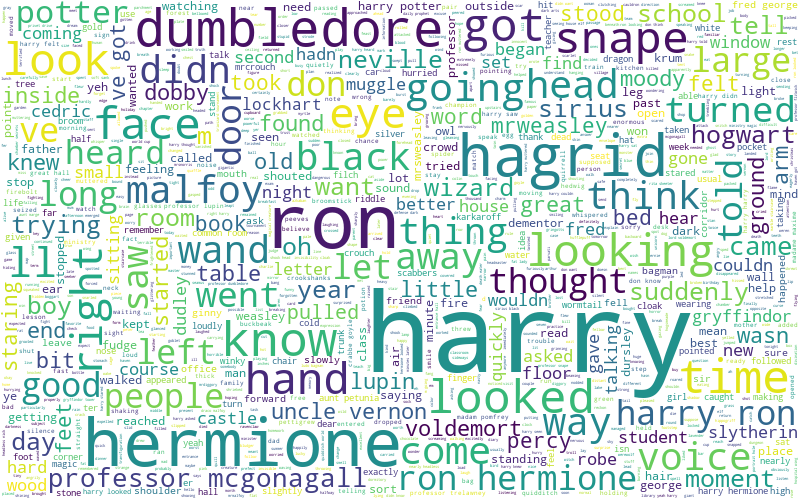

In [146]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", max_words=3000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(all_words)

# Visualize the word cloud
wordcloud.to_image()

In [147]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = ''
    lower = texts.lower()
    no_punctuation = NON_ALPHANUM.sub(r' ', lower)
    no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
    return no_non_ascii
  
hp_df['Sentence2'] = all_sentences.apply(normalize_texts)
hp_df.head()
hp_df['Sentence2'] = hp_df['Sentence2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# Text Rank Algorithm


TextRank is an unsupervised graph-based algorithm for keyword and keyphrase extraction, as well as summarization of text. The algorithm was introduced by Rada Mihalcea and Paul Tarau in their paper "Textrank: Bringing Order into Texts".

The TextRank algorithm consists of the following steps:

1. Text Preprocessing: The input text is cleaned by removing any stop words, punctuations, and other non-essential words. The remaining words are then converted into a graph where the nodes represent the words and the edges represent the relationship between the words.

2. Graph Construction: A graph is constructed using the nodes and edges, where the nodes represent the words, and the edges represent the relationship between the words. The relationship between the words can be defined using different metrics, such as cosine similarity, Jaccard similarity, or some other similarity metric.

3. Ranking Nodes: Each node in the graph is ranked based on its importance using an iterative algorithm. The importance of a node is calculated based on the sum of the importance scores of its neighbors. This is similar to the Google PageRank algorithm used for ranking web pages.

4. Selecting Keywords/Phrases: The top-ranked nodes are selected as keywords or keyphrases. The number of keywords or keyphrases selected can be pre-defined or based on a threshold value.

5. Summarization: The keywords or keyphrases can be used to generate a summary of the text. This can be done by selecting the sentences that contain the highest number of keywords or keyphrases.

The TextRank algorithm is a simple and effective way of extracting keywords and keyphrases from text, and generating summaries. It can be used in various applications such as text classification, recommendation systems, and natural language processing.

In [179]:
from sentence_transformers import SentenceTransformer

The below initializes a pre-trained SentenceTransformer model called "all-MiniLM-L6-v2".

SentenceTransformer is a Python library for generating sentence and text embeddings, which are numerical representations of textual data that can be used for tasks such as similarity matching, clustering, and classification. The library is built on top of the Transformers library from Hugging Face, which is a popular open-source library for natural language processing (NLP) tasks.

The "all-MiniLM-L6-v2" model used in the code is a pre-trained transformer model that is based on the MiniLM architecture, which is a smaller version of the well-known BERT model. The model has been trained on a large and diverse collection of text data, and is capable of generating high-quality sentence embeddings for a wide range of natural language processing tasks.

In [180]:
bmodel = SentenceTransformer('all-MiniLM-L6-v2')

The code bert_embeddings = bmodel.encode(hp_sentences[:2000]) generates sentence embeddings for the first 2000 sentences of the "hp_sentences" using the pre-trained "all-MiniLM-L6-v2" model initialized earlier with the name "bmodel".

The resulting bert_embeddings matrix will have a shape of (2000, embedding_size), where embedding_size is the size of the sentence embeddings generated by the model. The actual value of embedding_size depends on the architecture and configuration of the pre-trained model used.

In [181]:
bert_embeddings = bmodel.encode(hp_sentences[:2000])
bert_embeddings.shape

(2000, 384)

The code prints the first four sentences of the "hp_sentences" list, along with their corresponding sentence embeddings generated using the pre-trained "all-MiniLM-L6-v2" model.

The enumerate() function is used to iterate over the first 2000 sentences in "hp_sentences", and the zip() function is used to pair each sentence with its corresponding embedding from the bert_embeddings matrix.

In [182]:
for i, (sentence, embedding) in enumerate(zip(hp_sentences[:2000], bert_embeddings)):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    if i == 3: break

Sentence: 
HARRY POTTER AND THE CHAMBER OF SECRETS
by J
Embedding: [-4.93234880e-02  5.36252670e-02 -2.07240693e-02  6.74753962e-03
 -5.44992760e-02  4.73527703e-03  1.01671424e-02 -6.65984973e-02
  1.36869540e-02 -4.78445068e-02 -6.11548498e-02  4.70420942e-02
 -2.91775055e-02 -4.63095214e-03 -3.29879299e-02 -2.05020346e-02
  1.05388174e-02  9.38901678e-02  3.06045972e-02 -6.88970909e-02
  1.85281336e-02 -1.70141144e-03  5.44482246e-02 -4.20237668e-02
  8.34871270e-03  5.95409377e-03  4.61779088e-02  2.93322206e-02
 -7.10249841e-02 -9.95241255e-02 -3.47956754e-02 -8.03491194e-03
 -5.60158603e-02 -5.18047214e-02 -6.29849061e-02 -5.24122342e-02
 -6.49099797e-03  3.61507423e-02  3.41611542e-02 -6.52395794e-03
 -3.52358744e-02  3.72366235e-02 -1.68127827e-02  5.30787669e-02
 -3.71860020e-04  2.21250448e-02 -2.48641409e-02 -3.10840029e-02
 -2.63341572e-02  3.41985188e-02 -7.61241391e-02  1.89457145e-02
 -1.09015003e-01  4.63399850e-02  1.71690751e-02  3.19967978e-02
 -6.49880851e-04  1.541

In [183]:
import numpy as np
a = bert_embeddings[0]
b = bert_embeddings[1]
cos_sim = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
cos_sim

0.121609494

In [184]:
bert_embeddings.shape

(2000, 384)

In [185]:
from tqdm import tqdm

M = np.eye(2000)

for i,a in tqdm(enumerate(bert_embeddings)):
    for j,b in enumerate(bert_embeddings):
        if i != j:
            M[i,j] = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))

2000it [00:53, 37.24it/s]


The code creates a graph representation of the similarity matrix "M" using the networkx library. The resulting graph is an undirected graph where each node represents a sentence and each edge represents the similarity score between two sentences

In [186]:
import networkx

similarity_graph = networkx.from_numpy_array(M)
similarity_graph

In the given code snippet, sentence embeddings are first generated for the first 2000 sentences of the Harry Potter book using the pre-trained "all-MiniLM-L6-v2" model from the `sentence-transformers` library. Then, the cosine similarity between each pair of sentence embeddings is computed using a nested for loop and stored in a 2000x2000 matrix "M". This matrix "M" is then used to create an undirected graph using the `networkx` library, where each node represents a sentence and each edge represents the similarity score between two sentences. Finally, the resulting graph is visualized using the `matplotlib` library, with each node represented by a circle and each edge represented by a line connecting the corresponding nodes. The color of the nodes is set to lime green. 

The resulting visualization can be useful to gain insights into the structure of the text and identify relationships between different sentences. However, with many nodes and edges, the graph can be difficult to interpret. Therefore, clustering or dimensionality reduction techniques can be applied to reduce the complexity of the graph and make it easier to analyze.

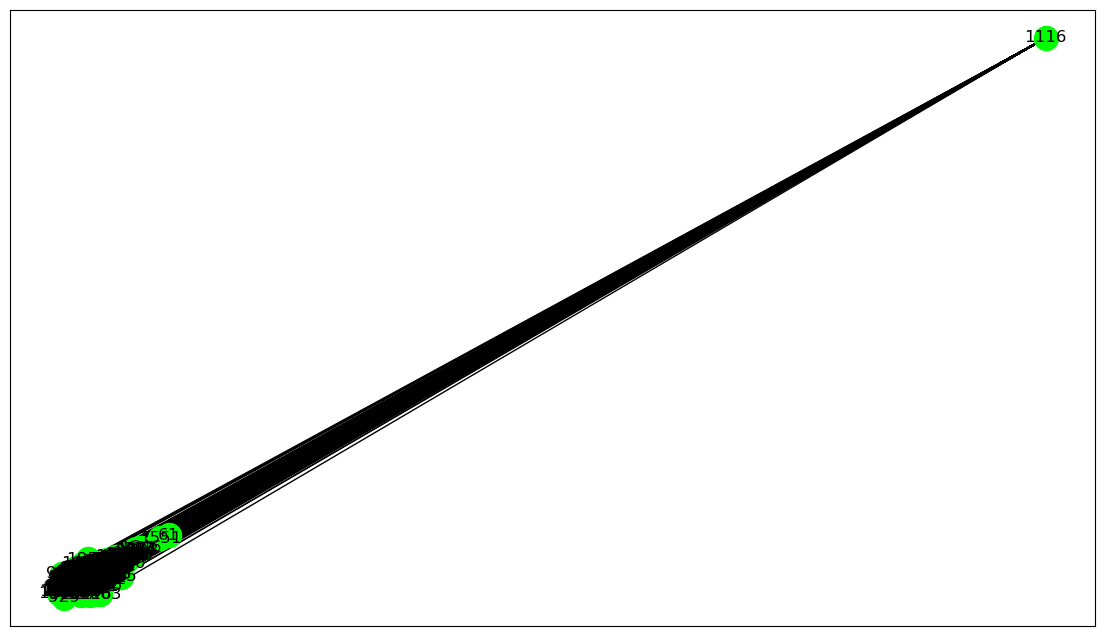

In [187]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14, 8))
networkx.draw_networkx(similarity_graph, node_color='lime')

The code snippet computes the PageRank score for each sentence in the similarity graph created earlier. The PageRank algorithm is a widely-used method for assigning scores to nodes in a graph, based on the importance of the other nodes in the graph that are connected to it. In the context of text summarization, the PageRank algorithm can be used to identify the most important sentences in a document based on their similarity to other sentences in the document.

The `networkx.pagerank()` function is used to calculate the PageRank scores for each node in the similarity graph. The resulting `scores` dictionary contains the PageRank score for each node in the graph, with the keys representing the indices of the sentences.

The `scores` dictionary is then sorted in descending order based on the PageRank scores, and the top 10 sentences with the highest scores are extracted and printed as tuples containing the score and the index of the sentence. These top-ranked sentences can be used to construct a summary of the text or to highlight the most important information in the document.

In [188]:
scores = networkx.pagerank(similarity_graph)
nx_ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
nx_ranked_sentences[:10]

[(0.0007379157166608729, 943),
 (0.0007355073292168067, 406),
 (0.0007349476773065155, 894),
 (0.0007327824043521785, 174),
 (0.0007211285239596218, 1467),
 (0.0007176382543918169, 243),
 (0.0007154579388173535, 408),
 (0.0007103266441297198, 206),
 (0.0007064772055979831, 1108),
 (0.0007063833665388329, 1195)]

In [189]:
for i in range(10):
    print(hp_sentences[nx_ranked_sentences[i][1]])
    print('----------')

I will attract your
attention when it is time to pack up.

"Four to a tray - there is a large supply of pots here - compost in the
sacks over there - and be careful of the Venemous Tentacula, it's
teething."

She gave a sharp slap to a spiky, dark red plant as she spoke, making
it draw in the long feelers that had been inching sneakily over her
shoulder.

Harry, Ron, and Hermione were joined at their tray by a curly-haired
Hufflepuff boy Harry knew by sight but had never spoken to.

"Justin Finch-Fletchley," he said brightly, shaking Harry by the hand.
"Know who you are, of course, the famous Harry Potter..
----------
"Just so you could carry on
tinkering with all that Muggle rubbish in your shed! And for your
information, Harry arrived this morning in the car you weren't
intending to fly!"

"Harry?" said Mr
----------
A few
people laughed and, gradually, a babble of talk broke out again.

Hermione closed Voyages with Vampires and looked down at the top
of Ron's head.

* 88

"Well, I d

## **Questions:-**

**1. What are you doing? What is the question?**<br>
We took harry potter dataset for first 4 books we performed sentiment analysis in order to identify the positive, negative and neutral words to analyse emotions, attitudes and opinions.
Then we performed Text rank algorithm in order to find the most important sentences.

**2. Data? Where is the data?** <br>
HarryPotter dataset from kaggle

**3. Algorithms? What approaches?** <br>
Sentiment Analysis and Text Rank algorithm

**4. Evaluation? How do you know it worked?**<br>
From the graph we can see the positive, negative and neutral words which represents the emotions, attitude and opinions.
The graph provide quick visual assessment of the overall sentiment of the text.
Word cloud provided me with insight that words in a visual format, where the size of the word represents its frequency or importance in the text.
Then I applied text rank algorithm which allowed me to find the important statements. The graph helped me to understand structure of the text and identify relationships between different sentences.



# **License**
MIT License 


Copyright (c) 2022 Devika Boddu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **References**

Dataset- https://github.com/nuochenpku/Harry-Potter-Dialogue-Dataset 


1. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/Model_Interpretability/SHAP%20and%20LIME%20analysis%20Walkthrough.ipynb

2. https://scikit-learn.org/stable/modules/cross_validation.html

3. https://levelup.gitconnected.com/random-forest-regression-209c0f354c84

4. https://builtin.com/data-science/random-forest-python

5.https://link.springer.com/article/10.1023/a:1010933404324